In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

In [88]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [89]:
# File to Load (Remember to Change These)
municipio_pov_dataload = "Resources/municipalpoverty.csv"
municipio_df = pd.read_csv(municipio_pov_dataload)
povertyindicators_dataload = "Resources/Concentrado, indicadores de pobreza.csv"
povertyindicators_df = pd.read_csv(povertyindicators_dataload)




In [90]:
municipaldata = pd.DataFrame(municipio_df)
new = municipaldata[['clave_entidad', 'entidad_federativa', 'clave_municipio', 'municipio', 'poblacion', 'pobreza', 'pobreza_pob']].copy()
new.head()

,clave_entidad,entidad_federativa,clave_municipio,municipio,poblacion,pobreza,pobreza_pob
0,1,Aguascalientes,1001,Aguascalientes,"861,446",26.1,"224,949"
1,1,Aguascalientes,1002,Asientos,"46,624",54,"25,169"
2,1,Aguascalientes,1003,Calvillo,"52,773",56.8,"29,951"
3,1,Aguascalientes,1004,Cosío,"15,321",43.2,"6,620"
4,1,Aguascalientes,1005,Jesús María,"125,750",25,"31,479"


In [91]:
mexico_state_df = new[new['entidad_federativa'].str.contains("México")]
poverty_by_municipality_df = mexico_state_df.rename(columns={"clave_entidad": "State ID",
                                    "entidad_federativa": "State", 
                                    "clave_municipio": "Municipality ID",
                                    "municipio": "Municipality",
                                    "poblacion": "Population",
                                    "pobreza": "% Poverty", 
                                    "pobreza_pob": "Total Population in Poverty"})

poverty_by_municipality_df

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty
656,15,México,15001,Acambay,"62,863",73.5,"46,233"
657,15,México,15002,Acolman,"171,774",56.2,"96,512"
658,15,México,15003,Aculco,"46,275",61.9,"28,628"
659,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,"10,354"
660,15,México,15005,Almoloya de Juárez,"179,746",59.9,"107,654"
...,...,...,...,...,...,...,...
776,15,México,15121,Cuautitlán Izcalli,"509,985",27.7,"141,173"
777,15,México,15122,Valle de Chalco Solidaridad,"452,170",59,"266,702"
778,15,México,15123,Luvianos,"24,639",84.9,"20,914"
779,15,México,15124,San José del Rincón,"84,040",76.3,"64,133"


In [92]:
povertyindicators_df



,Clave de entidad,Entidad federativa,Clave de municipio,Municipio,Población 2015*\n(leer nota al final del cuadro),Porcentaje de Pobreza\n2015,Personas Pobres\n2015,Carencias promedio de Pobreza\n2015,Porcentaje Pobreza Extrema\n2015,Personas Pobreza Extrema\n2015,...,Carencias promedio Población con al menos una carencia social\n2015,Porcentaje Población con tres o más carencias sociales\n2015,Personas Población con tres o más carencias sociales\n2015,Carencias promedio\n Población con tres o más carencias sociales 2015,Porcentaje Población con ingreso inferior a la línea de bienestar \n2015,Personas Población con ingreso inferior a la línea de bienestar\n2015,Carencias promedio Población con ingreso inferior a la línea de bienestar\n2015,Porcentaje Población con ingreso inferior a la línea de bienestar mínimo\n2015,Personas Población con ingreso inferior a la línea de bienestar mínimo\n2015,Carencias promedio Población con ingreso inferior a la línea de bienestar mínimo\n2015
0,15,México,15001,Acambay,"62,863",73.5,"46,233",2.4,19.8,"12,475",...,2.3,39.2,"24,627",3.4,75.0,"47,164",2.4,37.1,"23,336",2.6
1,15,México,15002,Acolman,"171,774",56.2,"96,512",2.0,8.6,"14,715",...,1.9,19.2,"32,987",3.3,67.9,"116,692",1.7,24.3,"41,814",2.0
2,15,México,15003,Aculco,"46,275",61.9,"28,628",2.2,10.7,"4,930",...,2.1,29.0,"13,408",3.4,63.6,"29,419",2.2,23.8,"10,993",2.4
3,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,"10,354",2.3,18.7,"2,638",...,2.2,34.4,"4,858",3.4,75.2,"10,616",2.2,37.5,"5,290",2.5
4,15,México,15005,Almoloya de Juárez,"179,746",59.9,"107,654",2.3,12.6,"22,666",...,2.2,28.9,"51,862",3.4,66.2,"118,999",2.1,25.3,"45,397",2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,15,México,15121,Cuautitlán Izcalli,"509,985",27.7,"141,173",1.9,2.8,"14,401",...,1.8,8.4,"43,048",3.3,43.0,"219,101",1.2,11.6,"59,110",1.6
121,15,México,15122,Valle de Chalco Solidaridad,"452,170",59.0,"266,702",2.1,9.5,"42,778",...,2.0,21.0,"94,843",3.3,71.2,"321,840",1.7,27.8,"125,851",2.0
122,15,México,15123,Luvianos,"24,639",84.9,"20,914",2.5,32.1,"7,911",...,2.4,44.7,"11,012",3.4,85.8,"21,145",2.5,54.4,"13,402",2.7
123,15,México,15124,San José del Rincón,"84,040",76.3,"64,133",2.6,22.8,"19,120",...,2.6,48.7,"40,958",3.4,76.4,"64,231",2.6,39.4,"33,153",2.7


In [93]:
povertyindicator = pd.DataFrame(povertyindicators_df)
new1 = povertyindicator[['Clave de municipio',
                         'Personas Rezago educativo\n2015', 
                         'Personas Carencia por acceso a los servicios de salud\n2015', 
                         'Personas Carencia por acceso a la seguridad social\n2015']].copy()

new2 = new1.rename(columns={"Clave de municipio": "Municipality ID",
                            "Personas Rezago educativo\n2015" : "People with education lag",
                            "Personas Carencia por acceso a los servicios de salud\n2015": "People without access to healthcare",
                            "Personas Carencia por acceso a la seguridad social\n2015": "People without social security"})
new2.head()


,Municipality ID,People with education lag,People without access to healthcare,People without social security
0,15001,"15,721","8,177","55,302"
1,15002,"19,176","34,621","107,655"
2,15003,"11,349","4,088","39,700"
3,15004,"3,811",986,"12,235"
4,15005,"39,433","22,250","132,743"


In [94]:
new2.dtypes

Municipality ID                         int64
People with education lag              object
People without access to healthcare    object
People without social security         object
dtype: object

In [95]:
mergepoverty = pd.merge(poverty_by_municipality_df, new2, on="Municipality ID", how="right")

mergepoverty['Total Population in Poverty'] = mergepoverty['Total Population in Poverty'].str.replace(',', '')
mergepoverty['People with education lag'] = mergepoverty['People with education lag'].str.replace(',', '')
mergepoverty['People without access to healthcare'] = mergepoverty['People without access to healthcare'].str.replace(',', '')
mergepoverty['People without social security'] = mergepoverty['People without social security'].str.replace(',', '')

mergepoverty

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security
0,15,México,15001,Acambay,"62,863",73.5,46233,15721,8177,55302
1,15,México,15002,Acolman,"171,774",56.2,96512,19176,34621,107655
2,15,México,15003,Aculco,"46,275",61.9,28628,11349,4088,39700
3,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,10354,3811,986,12235
4,15,México,15005,Almoloya de Juárez,"179,746",59.9,107654,39433,22250,132743
...,...,...,...,...,...,...,...,...,...,...
120,15,México,15121,Cuautitlán Izcalli,"509,985",27.7,141173,34153,111653,189795
121,15,México,15122,Valle de Chalco Solidaridad,"452,170",59,266702,71570,146256,299228
122,15,México,15123,Luvianos,"24,639",84.9,20914,8604,1204,21968
123,15,México,15124,San José del Rincón,"84,040",76.3,64133,32693,6730,79770


In [96]:
mergepoverty['Total Population in Poverty'] = mergepoverty['Total Population in Poverty'].astype(float)
mergepoverty['People with education lag'] = mergepoverty['People with education lag'].astype(float)
mergepoverty['People without access to healthcare'] = mergepoverty['People without access to healthcare'].astype(float)
mergepoverty['People without social security'] = mergepoverty['People without social security'].astype(float)
mergepoverty['Municipality ID'] = mergepoverty['Municipality ID'].astype(str).str.slice(2).astype(int)
mergepoverty

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security
0,15,México,1,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0
1,15,México,2,Acolman,"171,774",56.2,96512.0,19176.0,34621.0,107655.0
2,15,México,3,Aculco,"46,275",61.9,28628.0,11349.0,4088.0,39700.0
3,15,México,4,Almoloya de Alquisiras,"14,115",73.4,10354.0,3811.0,986.0,12235.0
4,15,México,5,Almoloya de Juárez,"179,746",59.9,107654.0,39433.0,22250.0,132743.0
...,...,...,...,...,...,...,...,...,...,...
120,15,México,121,Cuautitlán Izcalli,"509,985",27.7,141173.0,34153.0,111653.0,189795.0
121,15,México,122,Valle de Chalco Solidaridad,"452,170",59,266702.0,71570.0,146256.0,299228.0
122,15,México,123,Luvianos,"24,639",84.9,20914.0,8604.0,1204.0,21968.0
123,15,México,124,San José del Rincón,"84,040",76.3,64133.0,32693.0,6730.0,79770.0


In [97]:
mergepoverty.dtypes

State ID                                 int64
State                                   object
Municipality ID                          int32
Municipality                            object
Population                              object
% Poverty                               object
Total Population in Poverty            float64
People with education lag              float64
People without access to healthcare    float64
People without social security         float64
dtype: object

In [98]:
mergepoverty_byid = mergepoverty.set_index('Municipality ID') 
mergepoverty_byid

,State ID,State,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security
Municipality ID,,,,,,,,,
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0
2,15,México,Acolman,"171,774",56.2,96512.0,19176.0,34621.0,107655.0
3,15,México,Aculco,"46,275",61.9,28628.0,11349.0,4088.0,39700.0
4,15,México,Almoloya de Alquisiras,"14,115",73.4,10354.0,3811.0,986.0,12235.0
5,15,México,Almoloya de Juárez,"179,746",59.9,107654.0,39433.0,22250.0,132743.0
...,...,...,...,...,...,...,...,...,...
121,15,México,Cuautitlán Izcalli,"509,985",27.7,141173.0,34153.0,111653.0,189795.0
122,15,México,Valle de Chalco Solidaridad,"452,170",59,266702.0,71570.0,146256.0,299228.0
123,15,México,Luvianos,"24,639",84.9,20914.0,8604.0,1204.0,21968.0


In [99]:
denue_df  = pd.read_csv('Resources/DENUE_Filtered_complete.csv')
denue_df.head()


,Unnamed: 0,Código de la clase de actividad SCIAN,Código Tipo de Industria,Nombre de clase de la actividad,Nombre de la Unidad Económica,Descripcion estrato personal ocupado,Tipo de asentamiento humano,Nombre de asentamiento humano,Código Postal,Clave entidad,Entidad federativa,Clave municipio,Municipio,Clave localidad,Localidad,Área geoestadística básica,Tipo de establecimiento,Latitud,Longitud,Fecha de incorporación al DENUE
0,127785,463213,46,Comercio al por menor de lencerÃ­a,DEBAK ACCESORIOS,0 a 5 personas,COLONIA,EL PANTEÃN,52000.0,15,MÃXICO,51,LERMA,1,LERMA DE VILLADA,275,Fijo,19.289125,-99.506767,dic-14
1,487860,722517,72,Restaurantes con servicio de preparaciÃ³n de p...,POLLO PINTO,0 a 5 personas,COLONIA,COLINAS SAN MATEO,53218,15,MÃXICO,57,NAUCALPAN DE JUÃREZ,1,NAUCALPAN DE JUÃREZ,616,Fijo,19.494647,-99.275553,jul-10
2,271255,461122,46,Comercio al por menor de carne de aves,POLLERÃA PACHIS,0 a 5 personas,COLONIA,BENITO JUÃREZ 1A SECCIÃN,54405,15,MÃXICO,60,NICOLÃS ROMERO,1,CIUDAD NICOLÃS ROMERO,537,Fijo,19.625825,-99.315621,jul-10
3,359632,467114,46,Comercio al por menor de vidrios y espejos,VIDRIERÃA,0 a 5 personas,COLONIA,SAN MIGUEL TECAMACHALCO,53970,15,MÃXICO,57,NAUCALPAN DE JUÃREZ,1,NAUCALPAN DE JUÃREZ,512,Fijo,19.424169,-99.229945,jul-10
4,229661,463211,46,"Comercio al por menor de ropa, excepto de bebÃ...",NOVEDADES LUPITA,0 a 5 personas,COLONIA,CABECERA MUNICIPAL,56330,15,MÃXICO,31,CHIMALHUACÃN,1,CHIMALHUACÃN,37,Fijo,19.417730,-98.944452,jul-10


In [100]:
denue_df = denue_df [['Clave municipio', 
                      'Código Postal',
                      'Código Tipo de Industria',
                      'Descripcion estrato personal ocupado']]
denue_en = denue_df.rename(columns={"Clave municipio": "Municipality ID",
                            "Código Postal" : "Zip Code",
                            "Código Tipo de Industria": "Industry Code",
                            "Descripcion estrato personal ocupado": "Company Size"})
denue_en.head()

,Municipality ID,Zip Code,Industry Code,Company Size
0,51,52000.0,46,0 a 5 personas
1,57,53218,72,0 a 5 personas
2,60,54405,46,0 a 5 personas
3,57,53970,46,0 a 5 personas
4,31,56330,46,0 a 5 personas


In [102]:
poverty_final = pd.merge(mergepoverty_byid, denue_en, on="Municipality ID", how="right")
poverty_final = poverty_final.set_index('Municipality ID') 
poverty_final

,State ID,State,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security,Zip Code,Industry Code,Company Size
Municipality ID,,,,,,,,,,,,
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50337.0,31,0 a 5 personas
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300,62,0 a 5 personas
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300.0,46,0 a 5 personas
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300,46,0 a 5 personas
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50337.0,31,0 a 5 personas
...,...,...,...,...,...,...,...,...,...,...,...,...
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,46,0 a 5 personas
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,81,0 a 5 personas
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,46,0 a 5 personas


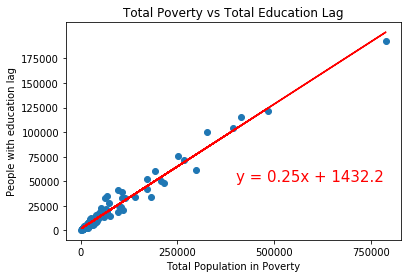

<Figure size 432x288 with 0 Axes>

In [106]:
#Now we are going to do plots and linear regressions testing the indicators of poverty,
#the last three columns, with the total population poverty per municipality.
population = mergepoverty.iloc[:,6]
education_lag = mergepoverty.iloc[:,7]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(population, education_lag)
mr_regress_values = population * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
education_plot = plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People with education lag'])
plt.plot (population, mr_regress_values, "r-")
plt.annotate(line_eq,(400000,50000),fontsize=15,color="red")
plt.xlabel("Total Population in Poverty")
plt.ylabel("People with education lag")
plt.title ("Total Poverty vs Total Education Lag")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 200000, step = 25000))


plt.show(education_plot)
plt.savefig('education_plot.png')

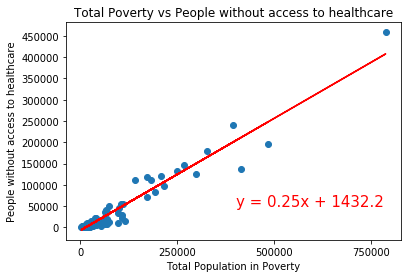

<Figure size 432x288 with 0 Axes>

In [107]:
healthcare = mergepoverty.iloc[:,8]
(hl_slope, hl_intercept, hl_rvalue, hl_pvalue, hl_stderr) = linregress(population, healthcare)
hl_regress_values = population * hl_slope + hl_intercept
line_eq_hl = "y = " + str(round(hl_slope,2)) + "x + " + str(round(hl_intercept,2))
healthcare_plot = plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People without access to healthcare'])
plt.plot (population, hl_regress_values, "r-")
plt.annotate(line_eq,(400000,50000),fontsize=15,color="red")
plt.xlabel("Total Population in Poverty")
plt.ylabel("People without access to healthcare")
plt.title ("Total Poverty vs People without access to healthcare")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 500000, step = 50000))
plt.show(healthcare_plot)

plt.savefig('healthcar_plot.png')

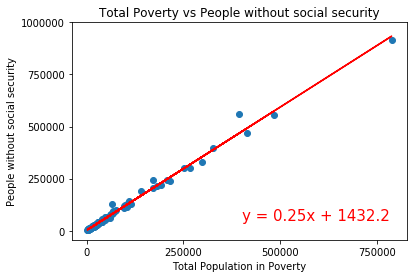

<Figure size 432x288 with 0 Axes>

In [109]:
social_security = mergepoverty.iloc[:,9]
(ss_slope, ss_intercept, ss_rvalue, ss_pvalue, ss_stderr) = linregress(population, social_security)
ss_regress_values = population * ss_slope + ss_intercept
line_eq_ss = "y = " + str(round(ss_slope,2)) + "x + " + str(round(ss_intercept,2))
socialsecurity_plot = plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People without social security'])
plt.plot (population, ss_regress_values, "r-")
plt.annotate(line_eq,(400000,50000),fontsize=15,color="red")
plt.xlabel("Total Population in Poverty")
plt.ylabel("People without social security")
plt.title ("Total Poverty vs People without social security")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 1250000, step = 250000))
plt.show(socialsecurity_plot)

plt.savefig('socialsecurity_plot.png')